In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
trained_data = pd.read_csv("new_train_sample.csv")

In [3]:
list(trained_data.columns)

['Unnamed: 0',
 'Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [4]:
pd.set_option('display.max_columns', None)
trained_data.head(5)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,TruePositive,NaN,NaN,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,97007,9177,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,BenignPositive,NaN,NaN,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,39978,114449,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [5]:
trained_data.shape

(4758418, 46)

In [6]:
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

DATACLEANING AND PREPROCESSING

In [7]:
trained_data.isnull().sum()

Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
FileName  

In [8]:
missing_percentage=(trained_data.isnull().sum()/(len(trained_data)))*100
missing_percentage

Unnamed: 0             0.000000
Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.437913
IncidentGrade          0.541672
ActionGrouped         99.407093
ActionGranular        99.407093
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.987542
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApp

In [9]:
threshold= len(trained_data)* 0.5   
trained_data=trained_data.dropna(thresh=threshold,axis=1)

In [10]:
trained_data.shape

(4758418, 36)

In [11]:
trained_data.duplicated().sum()

np.int64(0)

In [12]:
trained_data.drop_duplicates(inplace=True)

In [13]:
trained_data.isnull().sum()

Unnamed: 0                0
Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         25775
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                

In [14]:
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Id                  int64 
 2   OrgId               int64 
 3   IncidentId          int64 
 4   AlertId             int64 
 5   Timestamp           object
 6   DetectorId          int64 
 7   AlertTitle          int64 
 8   Category            object
 9   IncidentGrade       object
 10  EntityType          object
 11  EvidenceRole        object
 12  DeviceId            int64 
 13  Sha256              int64 
 14  IpAddress           int64 
 15  Url                 int64 
 16  AccountSid          int64 
 17  AccountUpn          int64 
 18  AccountObjectId     int64 
 19  AccountName         int64 
 20  DeviceName          int64 
 21  NetworkMessageId    int64 
 22  RegistryKey         int64 
 23  RegistryValueName   int64 
 24  RegistryValueData   int64 
 25  ApplicationId     

In [16]:
trained_data["IncidentGrade"].fillna(trained_data["IncidentGrade"].mode()[0], inplace= True)

In [17]:
trained_data.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [18]:
trained_data['Timestamp']=pd.to_datetime(trained_data['Timestamp'])

In [19]:
trained_data['Timestamp'].head()

0   2024-06-06 05:56:47+00:00
1   2024-06-03 10:45:09+00:00
2   2024-06-13 03:36:40+00:00
3   2024-06-08 16:54:57+00:00
4   2024-06-09 02:48:01+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [20]:
trained_data["Day"]=trained_data["Timestamp"].dt.day
trained_data["Month"]=trained_data["Timestamp"].dt.month
trained_data["Year"]=trained_data["Timestamp"].dt.year
trained_data["Hour"]=trained_data["Timestamp"].dt.hour
trained_data["Time"]=trained_data["Timestamp"].dt.time

In [21]:
trained_data.drop("Timestamp",axis=1, inplace=True)   

In [22]:
trained_data.head(1)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,5172780,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,6,6,2024,5,05:56:47


In [23]:
trained_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    2080549
TruePositive      1662087
FalsePositive     1015782
Name: count, dtype: int64

In [24]:
trained_data.Category.unique()

array(['Malware', 'Impact', 'Execution', 'SuspiciousActivity',
       'Exfiltration', 'InitialAccess', 'DefenseEvasion',
       'CommandAndControl', 'Discovery', 'Persistence',
       'CredentialAccess', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'PrivilegeEscalation', 'Exploit', 'Collection',
       'CredentialStealing', 'WebExploit', 'Weaponization'], dtype=object)

In [25]:
trained_data.isnull().sum()

Unnamed: 0            0
Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Day                   0
Month                 0
Year                  0
Hour                  0
Time                  0
dtype: int64

In [26]:
trained_data.describe()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour
count,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06
mean,4.757914e+06,8.425237e+11,1.815396e+02,7.066577e+04,4.062607e+05,1.105717e+02,2.945133e+03,9.566974e+04,1.287152e+05,2.857508e+05,1.503435e+05,3.523730e+05,4.642965e+05,3.408950e+05,3.569025e+05,1.432333e+05,4.801006e+05,1.628162e+03,6.347324e+02,8.595493e+02,2.200969e+03,3.342850e+03,8.807987e+02,2.622379e+05,1.076177e+05,3.583441e+03,4.898634e+00,6.465691e+01,2.236922e+02,1.351550e+03,9.936695e+03,9.794514e+00,5.909988e+00,2.024000e+03,1.215390e+01
std,2.747579e+06,4.962194e+11,3.868571e+02,1.208436e+05,4.590474e+05,4.345897e+02,1.145625e+04,1.633971e+04,3.399745e+04,1.412268e+05,3.748440e+04,1.665718e+05,2.902921e+05,1.600062e+05,1.745127e+05,3.606424e+04,1.416764e+05,6.684237e+01,1.262370e+01,1.912946e+01,3.313749e+02,5.101700e+02,1.282564e+01,8.155180e+04,3.220588e+04,9.093033e+01,7.031900e-01,9.310489e+00,6.276881e+01,3.508813e+02,2.605943e+03,6.156264e+00,2.896782e-01,4.176418e-03,6.781333e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.023000e+03,0.000000e+00
25%,2.378584e+06,4.123169e+11,1.000000e+01,5.030000e+02,2.323700e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,9.237300e+04,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,5.000000e+00,6.000000e+00,2.024000e+03,6.000000e+00
50%,4.757002e+06,8.418136e+11,4.500000e+01,1.032300e+04,2.165090e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,9.000000e+00,6.000000e+00,2.024000e+03,1.300000e+01
75%,7.137112e+06,1.271310e+12,1.710000e+02,8.436900e+04,6.709575e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,1.200000e+01,6.000000e+00,2.024000e+03,1.800000e+01
max,9.516834e+06,1.709397e+12,6.147000e+03,5.997030e+05,1.721456e+06,9.522000e+03,1.131730e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,3.100000e+01,

EXPLORATORY DATA ANALYSIS

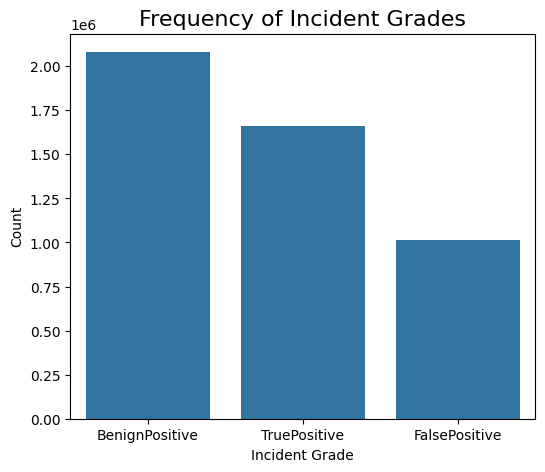

In [27]:
plt.figure(figsize=(6, 5))
sns.countplot(
    x="IncidentGrade",  
    data=trained_data,  
)
plt.title("Frequency of Incident Grades", fontsize=16)
plt.xlabel("Incident Grade", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

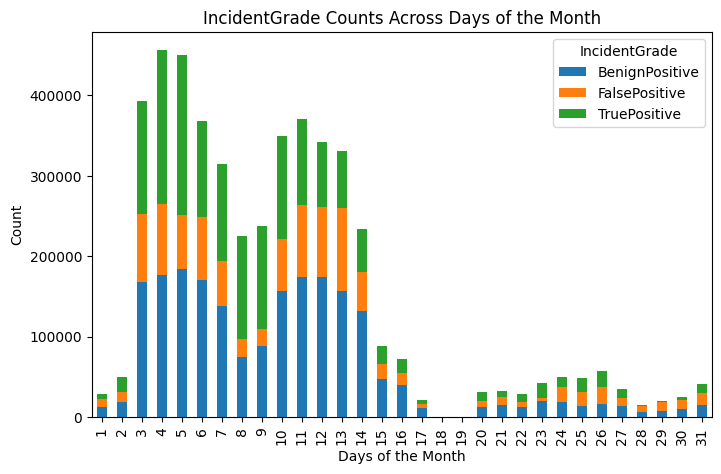

In [28]:
trained_data.groupby(['Day', 'IncidentGrade']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(8, 5), title='IncidentGrade Counts Across Days of the Month'
)
plt.xlabel('Days of the Month')
plt.ylabel('Count')
plt.legend(title='IncidentGrade')
plt.show()

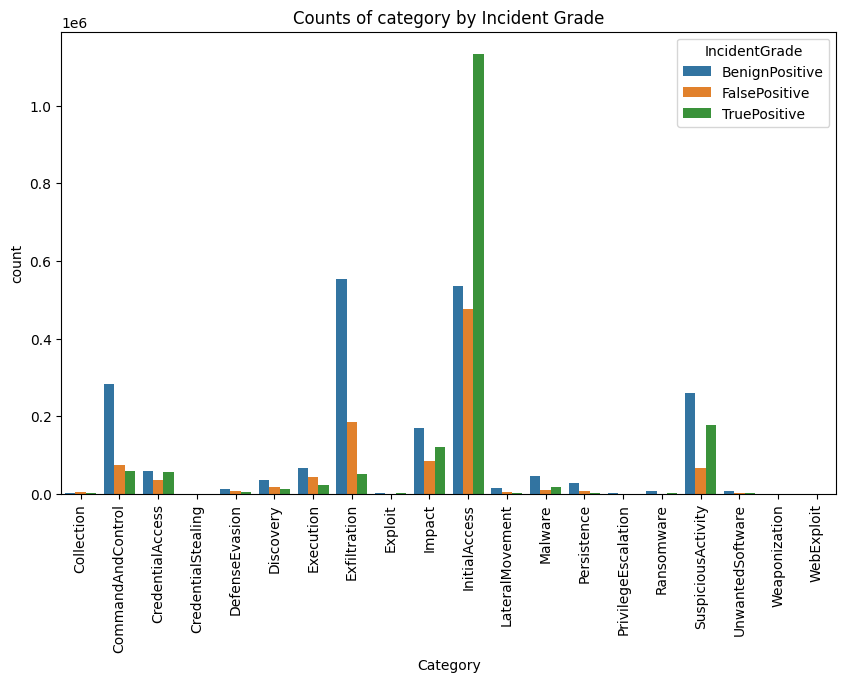

In [29]:
grouped_data=trained_data.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show() 

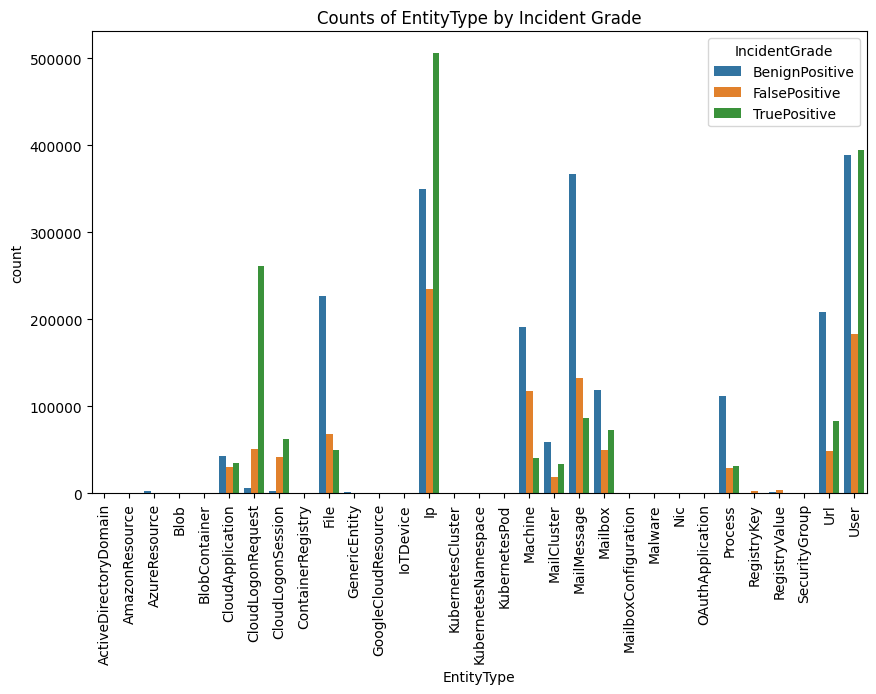

In [30]:
grouped_data=trained_data.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()


In [31]:
trained_data.head(1)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,5172780,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,6,6,2024,5,05:56:47


In [32]:
trained_data.drop(["Month","DeviceName","DeviceId","ResourceIdName","OAuthApplicationId","NetworkMessageId","Unnamed: 0"], axis =1 , inplace = True)

In [33]:
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 33 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Id                 int64 
 1   OrgId              int64 
 2   IncidentId         int64 
 3   AlertId            int64 
 4   DetectorId         int64 
 5   AlertTitle         int64 
 6   Category           object
 7   IncidentGrade      object
 8   EntityType         object
 9   EvidenceRole       object
 10  Sha256             int64 
 11  IpAddress          int64 
 12  Url                int64 
 13  AccountSid         int64 
 14  AccountUpn         int64 
 15  AccountObjectId    int64 
 16  AccountName        int64 
 17  RegistryKey        int64 
 18  RegistryValueName  int64 
 19  RegistryValueData  int64 
 20  ApplicationId      int64 
 21  ApplicationName    int64 
 22  FileName           int64 
 23  FolderPath         int64 
 24  OSFamily           int64 
 25  OSVersion          int64 
 26  CountryCode   

FEATURE SELECTION AND CORRELATION

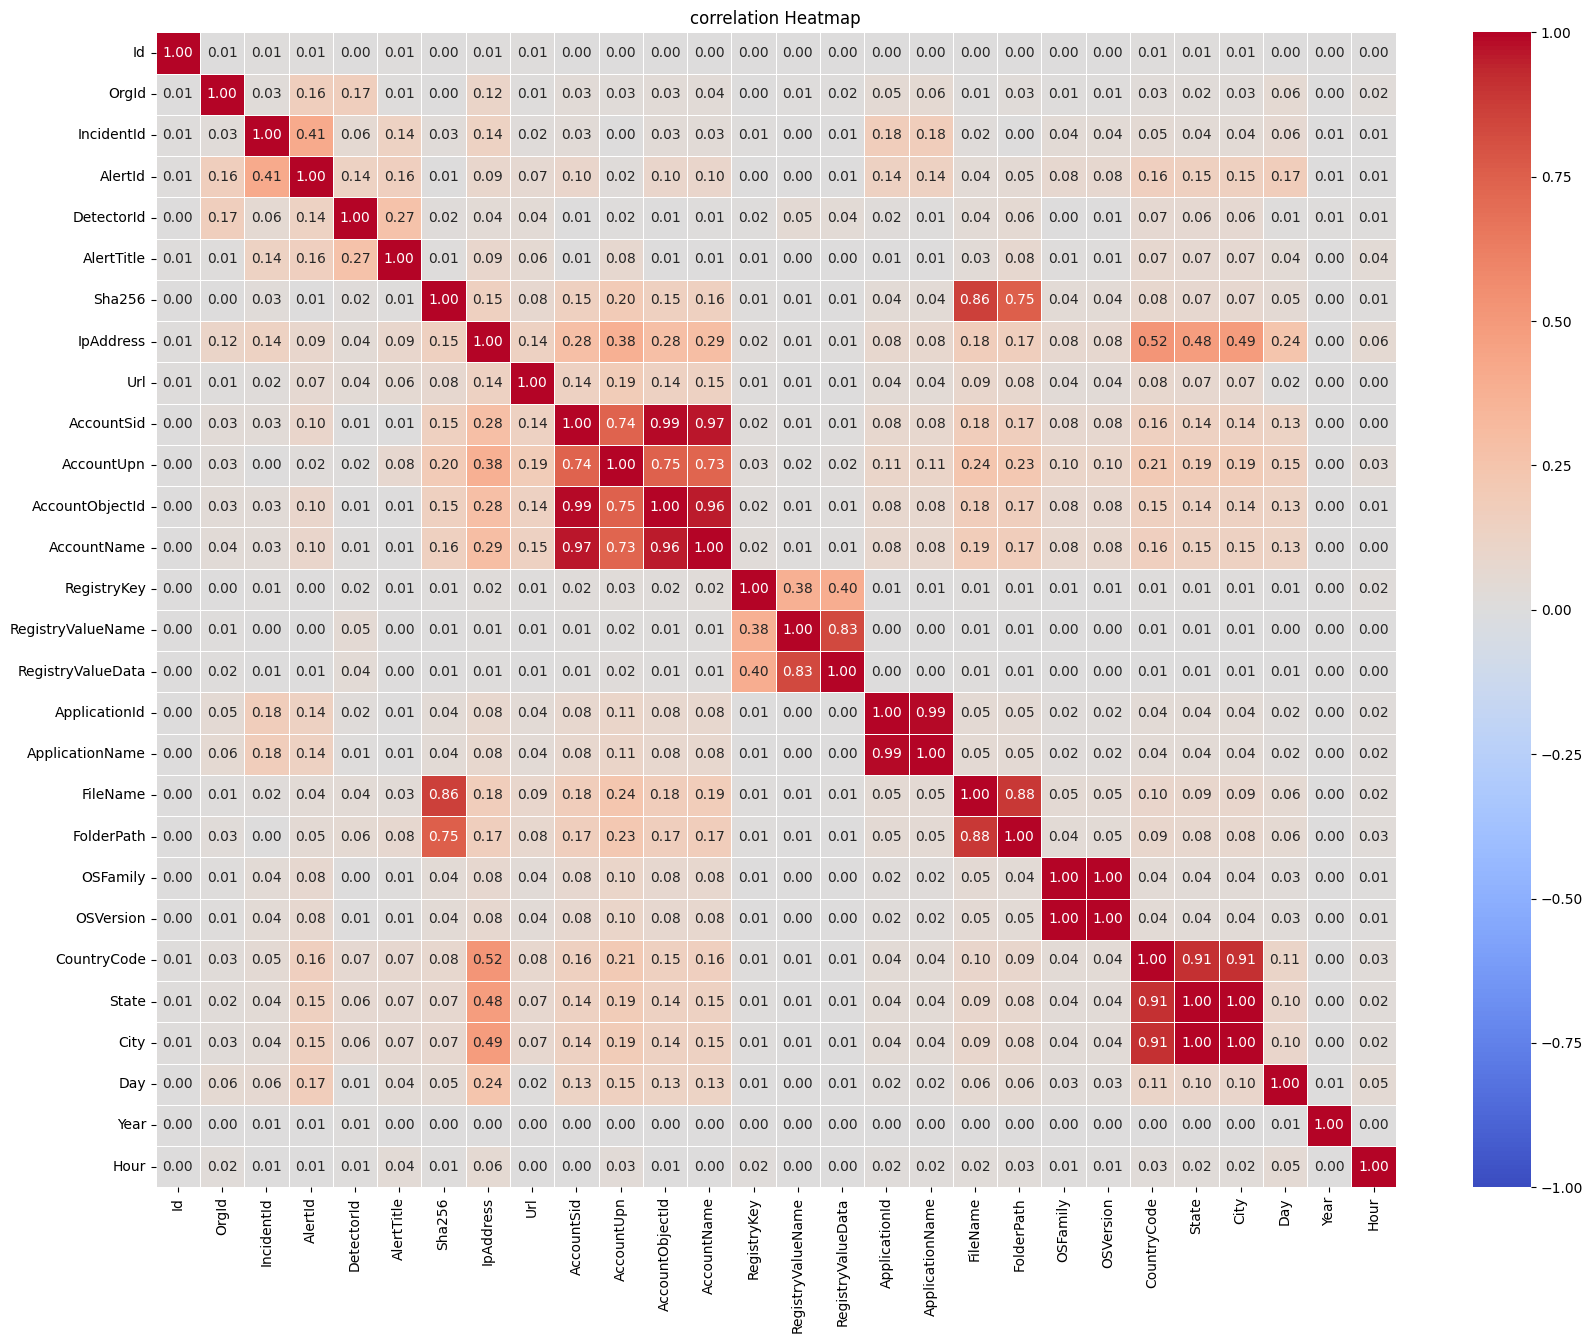

In [34]:
numeric_df=trained_data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [35]:
trained_data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)

In [36]:
trained_data.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)

In [37]:
trained_data.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)

In [38]:
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  ApplicationId  int64 
 11  City           int64 
 12  Day            int32 
 13  Year           int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(8), object(5)
memory usage: 526.4+ MB


ENCODING TECHNIQUE

In [39]:
trained_data.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [40]:
Categorical_train=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']

In [41]:
label_encoders = {}

for column in Categorical_train:
    le = LabelEncoder()
    trained_data[column] = le.fit_transform(trained_data[column])
    label_encoders[column] = le

In [42]:
trained_data

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,813,12,0,9,1,360606,160396,2251,10630,6,2024,5,21407
1,33,5065,3990,25,9,0,17,0,360606,160396,2251,10630,3,2024,10,38709
2,201,150787,807590,444,6,0,17,0,360606,160396,2251,10630,13,2024,3,13000
3,204,108287,28575,1233,16,2,9,1,360606,160396,2251,10630,8,2024,16,60897
4,54,528202,1458226,58829,7,0,9,0,360606,160396,2251,10630,9,2024,2,10081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,142,93987,15739,7836,7,1,19,0,360606,160396,2251,10630,10,2024,10,37517
4758414,36,1001,257479,2,1,1,30,0,360606,160396,2251,10630,11,2024,19,70252
4758415,851,31194,1518250,1,10,0,19,1,360606,160396,2251,10630,9,2024,4,16061
4758416,12,2419,1203,1334,9,0,13,1,546,160396,2251,10630,21,2024,23,82871


In [43]:
trained_data.select_dtypes(include=["int32","int64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [44]:
trained_data.to_csv('datatrained.csv',index= False)

CHECKING IMBALANCED DATASET

In [45]:
trained_data.head()

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,813,12,0,9,1,360606,160396,2251,10630,6,2024,5,21407
1,33,5065,3990,25,9,0,17,0,360606,160396,2251,10630,3,2024,10,38709
2,201,150787,807590,444,6,0,17,0,360606,160396,2251,10630,13,2024,3,13000
3,204,108287,28575,1233,16,2,9,1,360606,160396,2251,10630,8,2024,16,60897
4,54,528202,1458226,58829,7,0,9,0,360606,160396,2251,10630,9,2024,2,10081


In [46]:
X = trained_data.drop('IncidentGrade', axis=1)
y = trained_data['IncidentGrade']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [48]:
print("Class distribution before resampling:")
print(y_train.value_counts())

Class distribution before resampling:
IncidentGrade
0    1664439
2    1329669
1     812626
Name: count, dtype: int64


In [49]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("\nClass distribution after Random Oversampling:")
print(pd.Series(y_train_ros).value_counts())


Class distribution after Random Oversampling:
IncidentGrade
2    1664439
0    1664439
1    1664439
Name: count, dtype: int64


EVALUATE MODELS ON RESAMPLED DATA

In [50]:
model_lr = LogisticRegression(max_iter=100, multi_class='auto', verbose=0, solver='saga')
model_lr.fit(X_train_ros, y_train_ros)

c:\Users\Kiruthika Karthikeya\Desktop\Project-4 Cybersecurity\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Kiruthika Karthikeya\Desktop\Project-4 Cybersecurity\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='auto', solver='saga')

In [51]:
y_train_pred_lr = model_lr.predict(X_train_ros)

y_test_pred_lr = model_lr.predict(X_test)

train_accuracy = accuracy_score(y_train_ros, y_train_pred_lr)
train_precision = precision_score(y_train_ros, y_train_pred_lr, average='macro')
train_recall = recall_score(y_train_ros, y_train_pred_lr, average='macro')
train_f1_macro = f1_score(y_train_ros, y_train_pred_lr, average='macro')

test_accuracy = accuracy_score(y_test, y_test_pred_lr)
test_precision = precision_score(y_test, y_test_pred_lr, average='macro')
test_recall = recall_score(y_test, y_test_pred_lr, average='macro')
test_f1_macro = f1_score(y_test, y_test_pred_lr, average='macro')

metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
    'Training Score': [train_accuracy, train_precision, train_recall, train_f1_macro],
    'Testing Score': [test_accuracy, test_precision, test_recall, test_f1_macro]
})

print("\nLogistic Regression - Training and Testing Metrics:")
print(metrics_summary)


Logistic Regression - Training and Testing Metrics:
              Metric  Training Score  Testing Score
0           Accuracy        0.511370       0.539044
1  Precision (Macro)        0.509972       0.511300
2     Recall (Macro)        0.511370       0.510952
3   F1 Score (Macro)        0.506113       0.510761


In [52]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)
model_rf.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [53]:
y_train_pred_rf = model_rf.predict(X_train_ros)
y_test_pred_rf = model_rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train_ros, y_train_pred_rf)
train_precision_rf = precision_score(y_train_ros, y_train_pred_rf, average='macro')
train_recall_rf = recall_score(y_train_ros, y_train_pred_rf, average='macro')
train_f1_macro_rf = f1_score(y_train_ros, y_train_pred_rf, average='macro')

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='macro')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='macro')
test_f1_macro_rf = f1_score(y_test, y_test_pred_rf, average='macro')

metrics_summary_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
    'Training Score': [train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_macro_rf],
    'Testing Score': [test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_macro_rf]
})

print("\nRandom Forest - Training and Testing Metrics:")
print(metrics_summary_rf)


Random Forest - Training and Testing Metrics:
              Metric  Training Score  Testing Score
0           Accuracy        0.775898       0.799651
1  Precision (Macro)        0.827566       0.832491
2     Recall (Macro)        0.775898       0.775954
3   F1 Score (Macro)        0.779721       0.790128


In [54]:
model_dt = DecisionTreeClassifier(random_state=42,min_samples_split=10, min_samples_leaf=5, max_features= 'sqrt') 
model_dt.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [55]:
y_train_pred_dt = model_dt.predict(X_train_ros)
y_test_pred_dt = model_dt.predict(X_test)

train_accuracy_dt = accuracy_score(y_train_ros, y_train_pred_dt)
train_precision_dt = precision_score(y_train_ros, y_train_pred_dt, average='macro')
train_recall_dt = recall_score(y_train_ros, y_train_pred_dt, average='macro')
train_f1_macro_dt = f1_score(y_train_ros, y_train_pred_dt, average='macro')

test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt, average='macro')
test_recall_dt = recall_score(y_test, y_test_pred_dt, average='macro')
test_f1_macro_dt = f1_score(y_test, y_test_pred_dt, average='macro')

metrics_summary_dt = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
    'Training Score': [train_accuracy_dt, train_precision_dt, train_recall_dt, train_f1_macro_dt],
    'Testing Score': [test_accuracy_dt, test_precision_dt, test_recall_dt, test_f1_macro_dt]
})

print("\nDecision Tree - Training and Testing Metrics:")
print(metrics_summary_dt)


Decision Tree - Training and Testing Metrics:
              Metric  Training Score  Testing Score
0           Accuracy        0.932403       0.892843
1  Precision (Macro)        0.933799       0.879987
2     Recall (Macro)        0.932403       0.897181
3   F1 Score (Macro)        0.932429       0.886382


The Random Forest model performed the best overall, as it balanced training and testing performance effectively without significant overfitting.

In [56]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)
print("Model saved successfully")

Model saved successfully


In [57]:
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully")

Model loaded successfully


In [63]:
y_test_prob_rf = model_rf.predict_proba(X_test)   #Gives probability of target classification
print(y_test_prob_rf)

[[0.42062149 0.32915543 0.25022308]]


In [61]:
X_test = pd.DataFrame([[204,108287,28575,1233,16,9,1,360606,160396,2251,10630,8,2024,16,60897]],
        columns=['OrgId','IncidentId','AlertId','AlertTitle','Category','EntityType','EvidenceRole','IpAddress','Url','ApplicationId','City','Day','Year','Hour','Time'])
y_test_pred_rf = model_rf.predict(X_test) 
y_test_pred_rf

array([0])